In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('term-deposit-marketing-2020.csv')

## Read and inspect the data

In [3]:
# Exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [4]:
df.shape

(40000, 14)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [6]:
# Checking for data imbalanced or not
df['y'].value_counts()

y
no     37104
yes     2896
Name: count, dtype: int64

<Axes: xlabel='y', ylabel='count'>

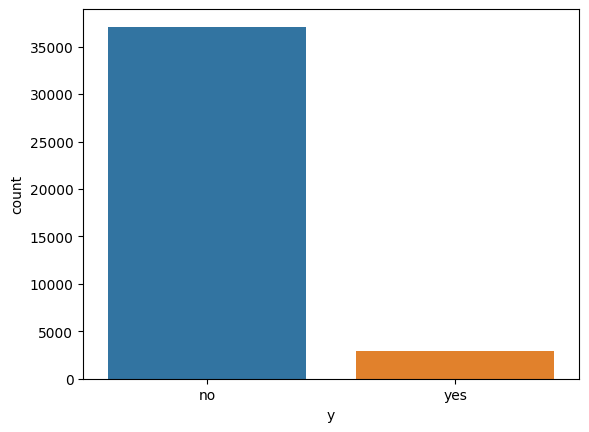

In [7]:
sns.countplot(x='y', data=df)

The value 'yes' is almost 8% of the entire target variable 'Y' which shows us that the data set is **highly imbalanced**. So, we will be applying suitable sampling techniques after encoding and scaling.

In [8]:
## Handling missing data if any

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

As no missing data, no imputation needed.

In [10]:
target = ['y']
X = df[df.columns.difference(target)]
y = df[target]

In [11]:
X.head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month
0,58,2143,1,unknown,5,no,261,tertiary,yes,management,no,married,may
1,44,29,1,unknown,5,no,151,secondary,yes,technician,no,single,may
2,33,2,1,unknown,5,no,76,secondary,yes,entrepreneur,yes,married,may
3,47,1506,1,unknown,5,no,92,unknown,yes,blue-collar,no,married,may
4,33,1,1,unknown,5,no,198,unknown,no,unknown,no,single,may


In [12]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


## EDA

### 1) Data Encoding

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
X.head()

,age,balance,campaign,contact,day,default,duration,education,housing,job,loan,marital,month
0,58,2143,1,unknown,5,no,261,tertiary,yes,management,no,married,may
1,44,29,1,unknown,5,no,151,secondary,yes,technician,no,single,may
2,33,2,1,unknown,5,no,76,secondary,yes,entrepreneur,yes,married,may
3,47,1506,1,unknown,5,no,92,unknown,yes,blue-collar,no,married,may
4,33,1,1,unknown,5,no,198,unknown,no,unknown,no,single,may


#### a) Starting with contact

<Axes: ylabel='count'>

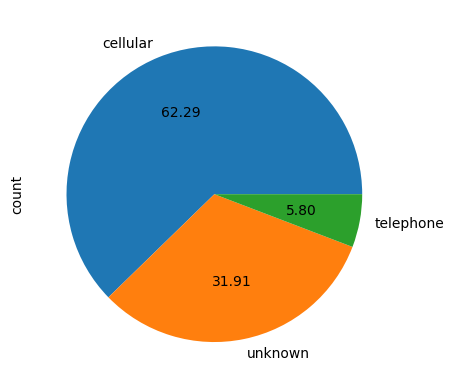

In [15]:
X['contact'].value_counts().plot.pie(autopct='%.2f')

In [16]:
X['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

Here we see that the feature 'contact' is a nominal categorical variable. So we can go ahead with One hot encoding as only 2 columns can be used to represent all values

In [17]:
## Making a function to handle all categorical feature encodings
def encode_and_concat(original_df, feature_to_encode):
    dummies = pd.get_dummies(original_df[[feature_to_encode]], drop_first=False, dtype=int)
    result = pd.concat([original_df, dummies], axis=1).drop([feature_to_encode], axis=1)
    return(result)

In [18]:
X = encode_and_concat(X, 'contact')

In [19]:
X.head()

,age,balance,campaign,day,default,duration,education,housing,job,loan,marital,month,contact_cellular,contact_telephone,contact_unknown
0,58,2143,1,5,no,261,tertiary,yes,management,no,married,may,0,0,1
1,44,29,1,5,no,151,secondary,yes,technician,no,single,may,0,0,1
2,33,2,1,5,no,76,secondary,yes,entrepreneur,yes,married,may,0,0,1
3,47,1506,1,5,no,92,unknown,yes,blue-collar,no,married,may,0,0,1
4,33,1,1,5,no,198,unknown,no,unknown,no,single,may,0,0,1


In [20]:
X['contact_cellular'].value_counts()

contact_cellular
1    24914
0    15086
Name: count, dtype: int64

In [21]:
X['contact_telephone'].value_counts()

contact_telephone
0    37679
1     2321
Name: count, dtype: int64

In [22]:
X['contact_unknown'].value_counts()

contact_unknown
0    27235
1    12765
Name: count, dtype: int64

#### 2) default 

Binary variable so converting False to 0 and True to 1

<Axes: ylabel='count'>

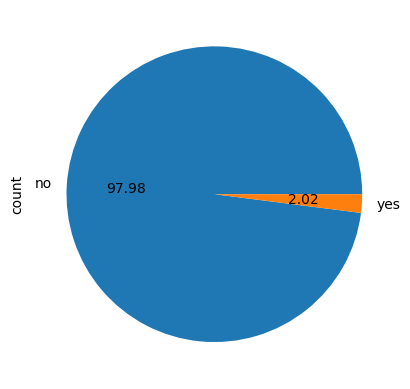

In [23]:
X['default'].value_counts().plot.pie(autopct='%.2f')

In [24]:
X['default'].value_counts()

default
no     39191
yes      809
Name: count, dtype: int64

In [25]:
X['default'] = X['default'].map({'yes':1, 'no':0})

In [26]:
X.head()

,age,balance,campaign,day,default,duration,education,housing,job,loan,marital,month,contact_cellular,contact_telephone,contact_unknown
0,58,2143,1,5,0,261,tertiary,yes,management,no,married,may,0,0,1
1,44,29,1,5,0,151,secondary,yes,technician,no,single,may,0,0,1
2,33,2,1,5,0,76,secondary,yes,entrepreneur,yes,married,may,0,0,1
3,47,1506,1,5,0,92,unknown,yes,blue-collar,no,married,may,0,0,1
4,33,1,1,5,0,198,unknown,no,unknown,no,single,may,0,0,1


In [27]:
X['default'].value_counts()

default
0    39191
1      809
Name: count, dtype: int64

#### 3) Education 

Ordinal categorical variable so will be using Label Encoding 

In [28]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [29]:
X['education'] = le_encoder.fit(X['education']).transform(X['education'])

In [30]:
X['education'].value_counts()

education
1    20993
2    11206
0     6270
3     1531
Name: count, dtype: int64

<Axes: ylabel='count'>

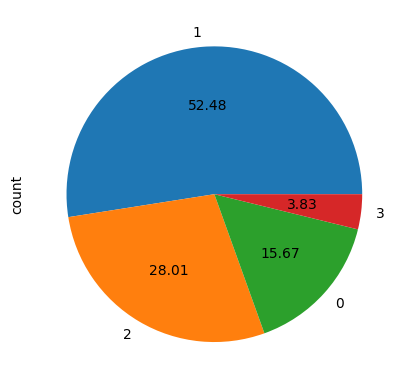

In [31]:
X['education'].value_counts().plot.pie(autopct='%.2f')

In [32]:
X.head()

,age,balance,campaign,day,default,duration,education,housing,job,loan,marital,month,contact_cellular,contact_telephone,contact_unknown
0,58,2143,1,5,0,261,2,yes,management,no,married,may,0,0,1
1,44,29,1,5,0,151,1,yes,technician,no,single,may,0,0,1
2,33,2,1,5,0,76,1,yes,entrepreneur,yes,married,may,0,0,1
3,47,1506,1,5,0,92,3,yes,blue-collar,no,married,may,0,0,1
4,33,1,1,5,0,198,3,no,unknown,no,single,may,0,0,1


In [33]:
X['education'].value_counts()

education
1    20993
2    11206
0     6270
3     1531
Name: count, dtype: int64

#### 4) housing 

Binary variable so converting no to 0 and yes to 1

In [34]:
X['housing'].value_counts()

housing
yes    24031
no     15969
Name: count, dtype: int64

<Axes: ylabel='count'>

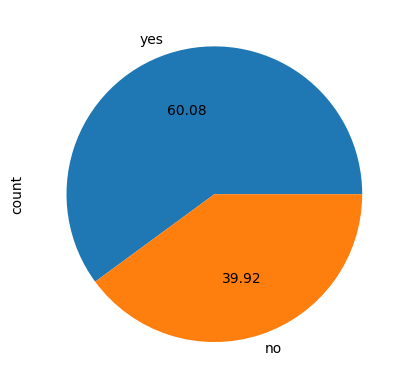

In [35]:
X['housing'].value_counts().plot.pie(autopct='%.2f')

In [36]:
X['housing'] = X['housing'].map({'yes':1, 'no':0})

In [37]:
X['housing'].value_counts()

housing
1    24031
0    15969
Name: count, dtype: int64

#### 4) job 

Ordinal categorical variable so will be using Label Encoding 

In [38]:
X['job'].value_counts()

job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: count, dtype: int64

<Axes: ylabel='count'>

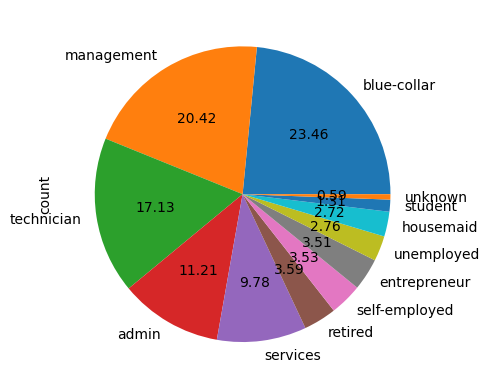

In [39]:
X['job'].value_counts().plot.pie(autopct='%.2f')

In [40]:
X['job'] = le_encoder.fit(X['job']).transform(X['job'])

In [41]:
X['job'].value_counts()

job
1     9383
4     8166
9     6852
0     4483
7     3910
5     1437
6     1414
2     1405
10    1104
3     1087
8      524
11     235
Name: count, dtype: int64

#### 5) loan

Binary variable so converting no to 0 and yes to 1

In [42]:
X['loan'].value_counts()

loan
no     33070
yes     6930
Name: count, dtype: int64

<Axes: ylabel='count'>

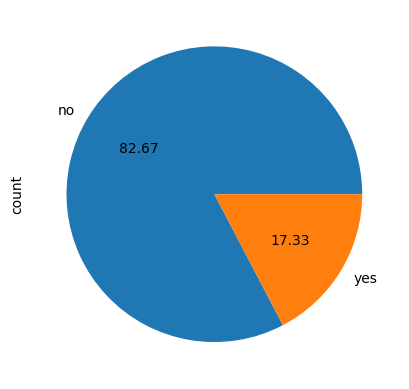

In [43]:
X['loan'].value_counts().plot.pie(autopct='%.2f')

In [44]:
X['loan'] = X['loan'].map({'yes':1, 'no':0})

In [45]:
X['loan'].value_counts()

loan
0    33070
1     6930
Name: count, dtype: int64

#### 5) marital

In [46]:
X['marital'].value_counts()

marital
married     24386
single      10889
divorced     4725
Name: count, dtype: int64

<Axes: ylabel='count'>

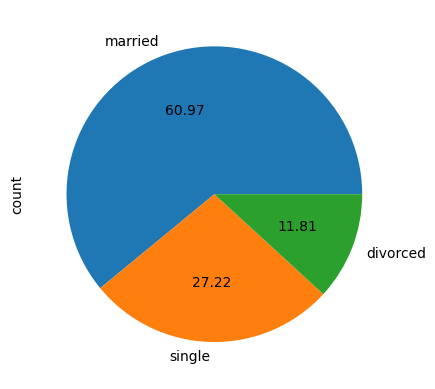

In [47]:
X['marital'].value_counts().plot.pie(autopct='%.2f')

Here we see that the feature 'marital' is a nominal categorical variable. So we can go ahead with One hot encoding as only 3 columns can be used to represent all values

In [48]:
X = encode_and_concat(X, 'marital')

In [49]:
X.head()

,age,balance,campaign,day,default,duration,education,housing,job,loan,month,contact_cellular,contact_telephone,contact_unknown,marital_divorced,marital_married,marital_single
0,58,2143,1,5,0,261,2,1,4,0,may,0,0,1,0,1,0
1,44,29,1,5,0,151,1,1,9,0,may,0,0,1,0,0,1
2,33,2,1,5,0,76,1,1,2,1,may,0,0,1,0,1,0
3,47,1506,1,5,0,92,3,1,1,0,may,0,0,1,0,1,0
4,33,1,1,5,0,198,3,0,11,0,may,0,0,1,0,0,1


#### 6) month

Ordinal categorical variable so will be using Label Encoding 

In [50]:
X['month'].value_counts()

month
may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct       80
dec       13
Name: count, dtype: int64

In [51]:
X['month'] = le_encoder.fit(X['month']).transform(X['month'])

In [52]:
X['month'].value_counts()

month
8     13532
5      6380
1      5215
6      4734
9      3598
0      2718
3      2296
4      1176
7       258
10       80
2        13
Name: count, dtype: int64

In [53]:
X.head()

,age,balance,campaign,day,default,duration,education,housing,job,loan,month,contact_cellular,contact_telephone,contact_unknown,marital_divorced,marital_married,marital_single
0,58,2143,1,5,0,261,2,1,4,0,8,0,0,1,0,1,0
1,44,29,1,5,0,151,1,1,9,0,8,0,0,1,0,0,1
2,33,2,1,5,0,76,1,1,2,1,8,0,0,1,0,1,0
3,47,1506,1,5,0,92,3,1,1,0,8,0,0,1,0,1,0
4,33,1,1,5,0,198,3,0,11,0,8,0,0,1,0,0,1


#### 7) Finally also converting y (target variable) to 1 and 0

In [54]:
y.value_counts()

y  
no     37104
yes     2896
Name: count, dtype: int64

<Axes: ylabel='count'>

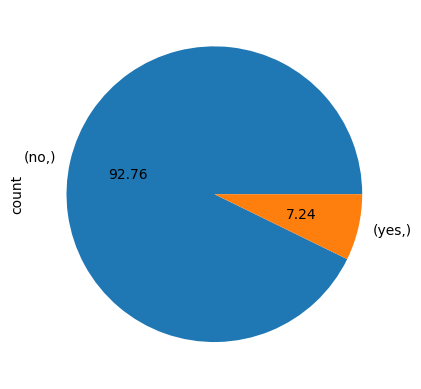

In [55]:
y.value_counts().plot.pie(autopct='%.2f')

In [56]:
y['y'] = y['y'].map({'yes':1, 'no':0})

In [57]:
y.value_counts()

y
0    37104
1     2896
Name: count, dtype: int64

### 2) Feature Scaling

Going ahead with scaling as the range of columns balance , duration are larger than other columns. Feature scaling helps in improving the performance of machine learning models.

In [58]:
from sklearn import preprocessing

In [59]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [60]:
X_scaled

array([[ 1.81041533,  0.29917431, -0.58109559, ..., -0.36598846,
         0.80017836, -0.61159713],
       [ 0.35838246, -0.42885395, -0.58109559, ..., -0.36598846,
        -1.24972137,  1.63506327],
       [-0.78250052, -0.43815233, -0.58109559, ..., -0.36598846,
         0.80017836, -0.61159713],
       ...,
       [ 1.3955488 , -0.36996425, -0.58109559, ...,  2.73232657,
        -1.24972137, -0.61159713],
       [-0.67878388, -0.0782708 , -0.58109559, ..., -0.36598846,
         0.80017836, -0.61159713],
       [-0.26391735,  0.05776097, -0.58109559, ..., -0.36598846,
         0.80017836, -0.61159713]])

In [61]:
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_scaled_df

,age,balance,campaign,day,default,duration,education,housing,job,loan,month,contact_cellular,contact_telephone,contact_unknown,marital_divorced,marital_married,marital_single
0,1.810415,0.299174,-0.581096,-1.330900,-0.143675,0.023811,1.078768,0.815179,-0.080837,-0.457772,0.855985,-1.285093,-0.248192,1.460674,-0.365988,0.800178,-0.611597
1,0.358382,-0.428854,-0.581096,-1.330900,-0.143675,-0.400305,-0.269608,0.815179,1.438371,-0.457772,0.855985,-1.285093,-0.248192,1.460674,-0.365988,-1.249721,1.635063
2,-0.782501,-0.438152,-0.581096,-1.330900,-0.143675,-0.689474,-0.269608,0.815179,-0.688520,2.184492,0.855985,-1.285093,-0.248192,1.460674,-0.365988,0.800178,-0.611597
3,0.669532,0.079802,-0.581096,-1.330900,-0.143675,-0.627785,2.427143,0.815179,-0.992362,-0.457772,0.855985,-1.285093,-0.248192,1.460674,-0.365988,0.800178,-0.611597
4,-0.782501,-0.438497,-0.581096,-1.330900,-0.143675,-0.219092,2.427143,-1.226725,2.046055,-0.457772,0.855985,-1.285093,-0.248192,1.460674,-0.365988,-1.249721,1.635063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.291832,-0.302809,-0.581096,-1.572504,-0.143675,-0.569951,1.078768,-1.226725,1.438371,-0.457772,0.168578,0.778154,-0.248192,-0.684615,-0.365988,0.800178,-0.611597
39996,-1.093650,0.711402,0.036377,-1.572504,-0.143675,-0.064868,1.078768,-1.226725,-0.080837,-0.457772,0.168578,0.778154,-0.248192,-0.684615,-0.365988,-1.249721,1.635063
39997,1.395549,-0.369964,-0.581096,-1.572504,-0.143675,-0.327048,-0.269608,-1.226725,-1.296204,-0.457772,0.168578,0.778154,-0.248192,-0.684615,2.732327,-1.249721,-0.611597
39998,-0.678784,-0.078271,-0.581096,-1.572504,-0.143675,0.336114,1.078768,-1.226725,-0.080837,-0.457772,0.168578,0.778154,-0.248192,-0.684615,-0.365988,0.800178,-0.611597


### 3) Sampling (to handle imbalanced dataset)

<Axes: xlabel='y', ylabel='count'>

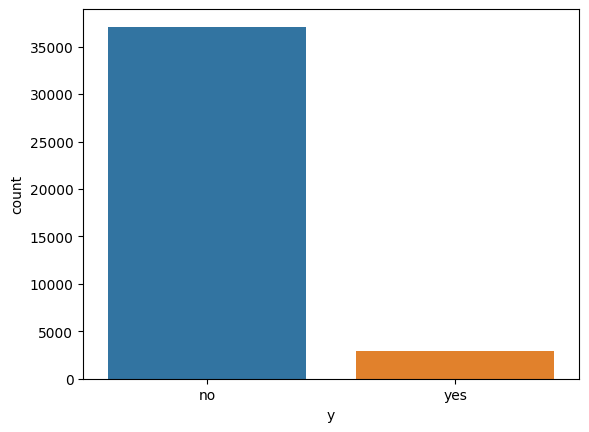

In [62]:
sns.countplot(x='y', data=df)

The data as we see is highly imbalanced as the minority class(yes) is representing less than 10% of the total samples. Hence, will be going ahead with Sampling alogorithms like SMOTE and SMOTETomek. Starting with **SMOTE** as it addresses the imbalance by generating synthetic samples for the minority class. It creates new instances by interpolating between existing minority class samples, making the dataset more balanced.

In [63]:
X_final = pd.concat([X_scaled_df, y], axis=1)
X_final.head()

,age,balance,campaign,day,default,duration,education,housing,job,loan,month,contact_cellular,contact_telephone,contact_unknown,marital_divorced,marital_married,marital_single,y
0,1.810415,0.299174,-0.581096,-1.3309,-0.143675,0.023811,1.078768,0.815179,-0.080837,-0.457772,0.855985,-1.285093,-0.248192,1.460674,-0.365988,0.800178,-0.611597,0
1,0.358382,-0.428854,-0.581096,-1.3309,-0.143675,-0.400305,-0.269608,0.815179,1.438371,-0.457772,0.855985,-1.285093,-0.248192,1.460674,-0.365988,-1.249721,1.635063,0
2,-0.782501,-0.438152,-0.581096,-1.3309,-0.143675,-0.689474,-0.269608,0.815179,-0.688520,2.184492,0.855985,-1.285093,-0.248192,1.460674,-0.365988,0.800178,-0.611597,0
3,0.669532,0.079802,-0.581096,-1.3309,-0.143675,-0.627785,2.427143,0.815179,-0.992362,-0.457772,0.855985,-1.285093,-0.248192,1.460674,-0.365988,0.800178,-0.611597,0
4,-0.782501,-0.438497,-0.581096,-1.3309,-0.143675,-0.219092,2.427143,-1.226725,2.046055,-0.457772,0.855985,-1.285093,-0.248192,1.460674,-0.365988,-1.249721,1.635063,0


In [64]:
X_final_features = X_final[X_final.columns.difference(['y'])]

In [65]:
from imblearn.over_sampling import SMOTE

sm =SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_final_features, y)
X_train_res.shape, y_train_res.shape

((74208, 17), (74208, 1))

Plot after Sampling technique : 

<Axes: ylabel='count'>

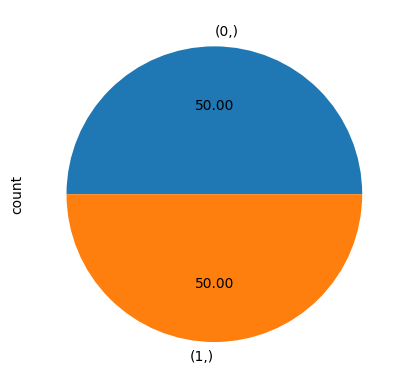

In [66]:
y_train_res.value_counts().plot.pie(autopct='%.2f')

Hurray! Now the dataset is balanced and now we can proceed ahead with the model building.

## ML Model Building

As the problem is a classification problem, we start by building baseline models and will decide upon which to proceed with by exploring the results.

In [67]:
## Splitting data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.3, random_state=125)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

classifiers = []

In [69]:
model = LogisticRegression(solver='lbfgs', C=1e4, max_iter=1000, penalty='l2')
classifiers.append(model)
model1 = xgb.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)

In [70]:
# training_accuracy = np.empty(6)
# test_accuracy = np.empty(6)

# result = pd.DataFrame(columns=['training_accuracy', 'test_accuracy'])
print("{} PERFORMANCE METRICS {}".format('\033[1m', '\033[0m'))
print("\n\n")
for clf in classifiers:
    clf.fit(x_train, y_train)
    training_accuracy = round(clf.score(x_train, y_train)*100)
    y_pred= clf.predict(x_test)
    test_accuracy = round(accuracy_score(y_test, y_pred)*100)
    model_name = clf.__class__.__name__
    print("Model: %s."%(model_name))
    print("Training Accuracy is %.2f amd Testing accuracy is %.2f"%(training_accuracy, test_accuracy))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix is \n %s"%(cm))
    print("Classification Report is \n %s"%(classification_report(y_test, y_pred)))
    print("\n")
# result

 PERFORMANCE METRICS 



Model: LogisticRegression.
Training Accuracy is 83.00 amd Testing accuracy is 82.00
Confusion Matrix is 
 [[9446 1600]
 [2322 8895]]
Classification Report is 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83     11046
           1       0.85      0.79      0.82     11217

    accuracy                           0.82     22263
   macro avg       0.83      0.82      0.82     22263
weighted avg       0.83      0.82      0.82     22263



Model: XGBClassifier.
Training Accuracy is 98.00 amd Testing accuracy is 96.00
Confusion Matrix is 
 [[10720   326]
 [  454 10763]]
Classification Report is 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     11046
           1       0.97      0.96      0.97     11217

    accuracy                           0.96     22263
   macro avg       0.96      0.97      0.96     22263
weighted avg       0.97      0.96      0.96     22263



<p>Herein, the problem is a classification problem, so we will consider Precision, Recall and the F1 score as they are better representative of performance in the case of imbalanced datasets.</p> <p> The performance based on the F1 score is baseline models are of the following order: </p>

<p> <b> XGBoost == Random Forest >> Decision Tree >> Logistic Regression >> Support Vector </b> </p> 

Random Forest and XGBoost both seem pretty good so going ahead with testing them with the **KFold Cross Validation**.

**Model Selection** 
<p>From the above results we see that most of the tree based models are performing pretty well .</p>

So going ahead with **Random Forest** and **XG Boost** as both seem to have pretty good scores or Precision, Recall and F1-Score which are more important when dataset is imbalanced in Binary Classification problems.

In [71]:
# Generate the confusion matrix and classification report

ypred = clf.predict(x_test)
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))


[[10459   587]
 [  203 11014]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     11046
           1       0.95      0.98      0.97     11217

    accuracy                           0.96     22263
   macro avg       0.97      0.96      0.96     22263
weighted avg       0.97      0.96      0.96     22263



### Stratified KFold Cross Validation

We cannot use <u>KFold Cross Validation</u> as is because the data is split into k-folds with a uniform probability distribution.

When the distribution is severely skewed, it is likely that one or more folds will have few or no examples from the minority class. This means that some or perhaps many of the model evaluations will be misleading, as the model need only predict the majority class correctly. Thus proceeding with **Stratified KFold Cross Validation**

In [72]:
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

skfold = StratifiedKFold(n_splits=5)

xgboost_results = cross_validate(estimator=model1, X=X_train_res, y=y_train_res, cv=skfold, scoring=scoring)
random_forest_results = cross_validate(estimator=model4, X=X_train_res, y=y_train_res, cv=skfold, scoring=scoring)

In [73]:
# Printing performance metrics
print("{} STRATIFIED KFOLD PERFORMANCE METRICS FOR XGBOOST. {}".format('\033[1m', '\033[0m'))
print("Accuracy= %.4f."%(np.mean(xgboost_results['test_accuracy'])*100.0))
print("Precision= %.4f."%(np.mean(xgboost_results['test_precision'])*100.0))
print("Recall= %.4f."%(np.mean(xgboost_results['test_recall'])*100.0))
print("F1 Score= %.4f."%(np.mean(xgboost_results['test_f1_score'])*100.0))

print("{} \n STRATIFIED KFOLD PERFORMANCE METRICS FOR RANDOM FOREST. {}".format('\033[1m', '\033[0m'))
print("Accuracy= %.4f."%(np.mean(random_forest_results['test_accuracy'])*100.0))
print("Precision= %.4f."%(np.mean(random_forest_results['test_precision'])*100.0))
print("Recall= %.4f."%(np.mean(random_forest_results['test_recall'])*100.0))
print("F1 Score= %.4f."%(np.mean(random_forest_results['test_f1_score'])*100.0))


 STRATIFIED KFOLD PERFORMANCE METRICS FOR XGBOOST. 
Accuracy= 70.2966.
Precision= 68.3437.
Recall= 93.1896.
F1 Score= 76.4144.
 
 STRATIFIED KFOLD PERFORMANCE METRICS FOR RANDOM FOREST. 
Accuracy= 76.8566.
Precision= 70.6932.
Recall= 97.7523.
F1 Score= 81.4330.


From the above, we note that Random Forest is better than XGBoost. So will be selecting it as our most apt algorithm. 

#### Success Metric Achieved: 5-fold stratified cross validation with greater than 81% performance metric: 

**Explanation:** We could solve this binary classification problem with highly imbalanced dataset with Random Forest. And the success metric we are choosing is Recall which is **97.72%** and also the F1-Score is 81.83% . The reason for selecting **recall** as our main performance metric is that in this case, **False Negatives** are more important than False Positives. Let us say we are calling the customers for a new term insurance from our model results. Rather than calling everyone, we will only call customers who are more likely to buy. We cannot afford to miss a person who was going to buy the term insurance, but our model predicted it as Not buying(False Negative). Plus, if a person is not interested in buying but our model classifies them as interested, there is no harm in calling them or not but should never miss an interested person. So, selecting the **model** with **highest recall** value.

### SUMMARY:

### OBJECTIVE:

<p style='text-align: justify;'> The purpose of the project was to find features that are important in improving the 
success rate for calls made to customers for the term loan product that was being sold. We are trying to decipher the success of the marketing campaign where term deposit option is being provided to users. Not only are we trying to predict based on above information whether a client will subscribe to a term deposit or not but also trying to find features which are most important in predicting as to which segment of customers the client should prioritize </p>

**Objective:**

### Goal 1:
<p> Predicting a customer will opt to a term deposit or not. </p> 

**Solution Strategy:** Steps incorporated are as follows:

<p style='text-align: justify;'> a) <b><i> Data Cleaning and Preprocessing: </b></i> Firstly, the dataset was explored to understand the data better. It was seen that the dataset is large and it is moderately imbalanced. We went ahead with creating a model and it did generalize well. So did not undertake any sampling techniques. </p>

<p> b) <b><i> ML Model Selection: </b></i> We proceeded to selection of a baseline Machine Learning model. </p>
<p style='text-align: justify;'> The problem is a Supervised learning problem falling into the subset of binary classification. Such problems can be solved with the help of a number of ML models like Logistic Regression, Support Vector Machine, Decision tree, Random Forest, XGBoost. etc. </p>
<p style='text-align: justify;'> And thus, all above listed models were tried without explicit hyperparameters set as we are initially looking for a baseline model which gives us a good accuracy score. This can later be adjusted through hyperparameter tuning to increase the accuracy score, and thus helping us in finding the optimal learning algorithm. </p>  

In our specific usecase, we are going for the performance metric as **Recall** rather than accuracy because  **False Negatives** are more important than False Positives as explained earlier for the Positive class. 
Let us say we are calling the customers for a new term insurance from our model results. Rather than calling everyone, we will only call customers who are more likely to buy. We cannot afford to miss a person who was going to buy the term insurance, but our model predicted it as Not buying(False Negative). So, selecting the **model** with **highest recall** value for the positive class is more important.

Algorithms Tried with their **recall** values for positive class:
1) LogisticRegression	    79% 	
2) XGBClassifier	        96%	
3) SVC              	    91%	
4) DecisionTreeClassifier	94%	
5) RandomForestClassifier	96%	

Here we found that all the models **Random Forest** and **XGBoost** both seem pretty good so tested them with the Stratified KFold Cross Validation. 

Finally, after **Stratified KFold cross validation**, it was found that **Random Forest** works best as it has highest Recall **97.77%** value with decent precision 71.19% and very good F1-Score 81.72% as well.

### Bonus(es)


### Goal 2:
<p> a) What makes the customers buy? Tell us which feature we should be focusing more on.</p>

**Solution**:

a) **Feature Selection**

It can be done by finding **feature importance**. Feature importance is the technique used to assess the significance or contribution of each feature in the model's decision-making process. It helps in understanding which features are the most influential in making predictions and can provide insights into our model.

We have a great fitting **Random Forest model with 97.77% recall and F1-Score as 81.72%** after Stratified KFold Validation. Feature importance for a random forest can be found based on the decrease in impurity (usually Gini impurity for classification or mean squared error for regression) that each feature causes when used in a tree node . This is built-in SkLearn so will be leveraging that. 

In [74]:
# In our case model4 is the Random Forest so going ahead with that.
feature_imp = model4.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train_res.columns, 'Importance': feature_imp})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

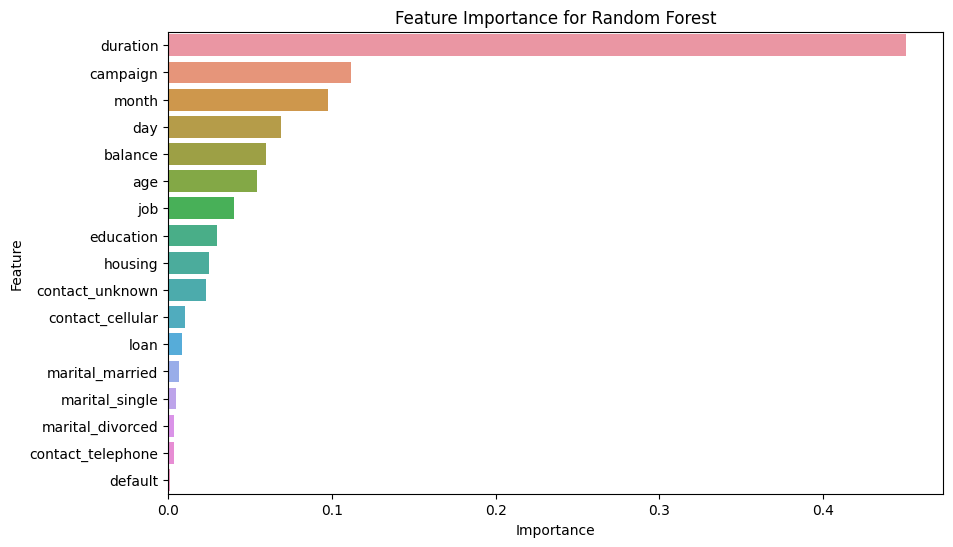

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df)
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Refer above graph as 1.1

Referring to Graph 1.1, 
we can see that the **Most important features** of above dataset are:
1) **duration** - last contact duration, in seconds (numeric)
2) **campaign** - number of contacts performed during this campaign and for this client (numeric)
3) **month** - last contact month of year (categorical)
4) **day** - last contact day of month (categorical)
5) **balance** - average yearly balance (numeric)
6) **age** - age of customer (numeric)
7) **job** - those who have a job (categorical)
8) **education** - education attained (categorical)
9) **housing** - has a housing loan (binary)

### Goal 2:
<p> b) We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize. </p>

For **Segment of customers selection** , we will go ahead with PCA as there are a number of mixed features, ie, there are categorical as well as continuous features. And then will be applying agglomerative clustering as it handles mixed features.

In [76]:
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000,40000,40000,40000,40000.000000,40000,40000,40000,40000.000000,40000,40000.000000,40000.000000,40000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,11,NaN,NaN,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,9383,24386,20993,39191,NaN,24031,33070,24914,NaN,13532,NaN,NaN,37104
mean,40.544600,NaN,NaN,NaN,NaN,1274.277550,NaN,NaN,NaN,16.017225,NaN,254.824300,2.882175,NaN
std,9.641776,NaN,NaN,NaN,NaN,2903.769716,NaN,NaN,NaN,8.278127,NaN,259.366498,3.239051,NaN
min,19.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,54.000000,NaN,NaN,NaN,8.000000,NaN,100.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,407.000000,NaN,NaN,NaN,17.000000,NaN,175.000000,2.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1319.000000,NaN,NaN,NaN,21.000000,NaN,313.000000,3.000000,NaN


In [77]:
# Applying for numeric variables: duration, campaign, balance and age.

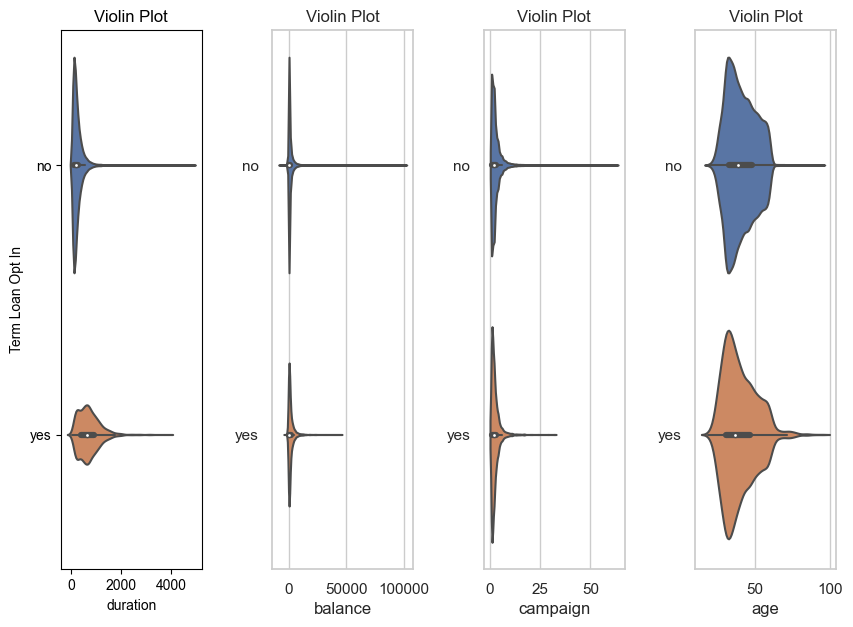

In [78]:
plt.figure(1, figsize=(10,7))
n=0
for x in ['duration', 'balance', 'campaign', 'age']:
    n += 1
    plt.subplot(1, 4, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x = x, y = 'y', data = df)
    plt.ylabel('Term Loan Opt In' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()


### Extracting above mentioned numeric and categorical features:

In [79]:
X_selected = X_scaled_df[['duration','campaign','month','day','balance','age','job','education','housing']]
X_selected

,duration,campaign,month,day,balance,age,job,education,housing
0,0.023811,-0.581096,0.855985,-1.330900,0.299174,1.810415,-0.080837,1.078768,0.815179
1,-0.400305,-0.581096,0.855985,-1.330900,-0.428854,0.358382,1.438371,-0.269608,0.815179
2,-0.689474,-0.581096,0.855985,-1.330900,-0.438152,-0.782501,-0.688520,-0.269608,0.815179
3,-0.627785,-0.581096,0.855985,-1.330900,0.079802,0.669532,-0.992362,2.427143,0.815179
4,-0.219092,-0.581096,0.855985,-1.330900,-0.438497,-0.782501,2.046055,2.427143,-1.226725
...,...,...,...,...,...,...,...,...,...
39995,-0.569951,-0.581096,0.168578,-1.572504,-0.302809,1.291832,1.438371,1.078768,-1.226725
39996,-0.064868,0.036377,0.168578,-1.572504,0.711402,-1.093650,-0.080837,1.078768,-1.226725
39997,-0.327048,-0.581096,0.168578,-1.572504,-0.369964,1.395549,-1.296204,-0.269608,-1.226725
39998,0.336114,-0.581096,0.168578,-1.572504,-0.078271,-0.678784,-0.080837,1.078768,-1.226725


As we are interested in finding customer segment(s) most likely to buy the product, so will be focussing on the positive dataset:

In [80]:
X_combine = pd.concat([X_selected, df['y']], axis=1)
df_positive = X_combine[X_combine['y']=='yes']
df_positive = df_positive.drop(axis=1, columns='y')
df_positive.head()


,duration,campaign,month,day,balance,age,job,education,housing
83,3.035032,-0.581096,0.855985,-1.3309,0.368051,1.914132,-1.296204,-0.269608,0.815179
86,4.673660,-0.581096,0.855985,-1.3309,-0.423344,1.602982,-1.296204,-0.269608,-1.226725
87,4.372924,-0.581096,0.855985,-1.3309,-0.001473,0.047233,1.438371,-0.269608,0.815179
129,1.249891,-0.581096,0.855985,-1.3309,0.413854,1.499265,0.830688,-0.269608,0.815179
168,1.612317,-0.272359,0.855985,-1.3309,-0.375474,1.395549,-1.296204,1.078768,-1.226725


### Agglomerative clustering

The attributes were reduced to three dimensions as there were many attributes. Now, I will be performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved. It was chosen because I needed a method which could handle both categorical and numerical features.

**Steps involved in the Clustering**
* Elbow Method to determine the number of clusters to be formed
* Clustering via Agglomerative Clustering
* Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


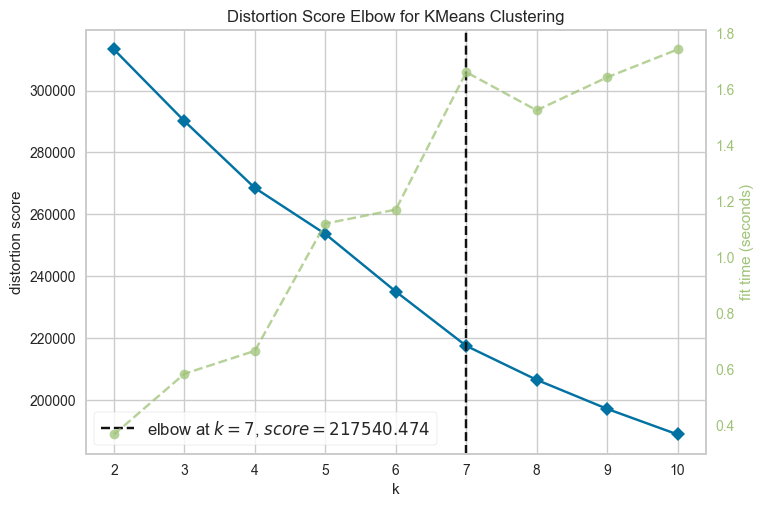

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:
# Quick examination of elbow method to find numbers of clusters to make.
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_selected)
Elbow_M.show()

### Optimal no. of clusters: 

The above cell indicates that the optimal number of clusters for this data will be **7**. 
Next, we will be fitting the Agglomerative Clustering Model to get the final clusters. 

In [ ]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=7)
# fit model and predict clusters
yhat_AC = AC.fit_predict(X_selected)
X_selected["Clusters"] = yhat_AC


To examine the clusters formed let's have a look at the 3-D distribution of the clusters. 

In [95]:
X_selected['Clusters'].value_counts()

Clusters
0    12890
1     8690
5     6882
4     3999
6     3119
2     2423
3     1997
Name: count, dtype: int64

In [96]:
X_combine = pd.concat([X_selected, df['y']], axis=1)
X_combine.head()

,duration,campaign,month,day,balance,age,job,education,housing,Clusters,y
0,0.023811,-0.581096,0.855985,-1.3309,0.299174,1.810415,-0.080837,1.078768,0.815179,1,no
1,-0.400305,-0.581096,0.855985,-1.3309,-0.428854,0.358382,1.438371,-0.269608,0.815179,1,no
2,-0.689474,-0.581096,0.855985,-1.3309,-0.438152,-0.782501,-0.688520,-0.269608,0.815179,5,no
3,-0.627785,-0.581096,0.855985,-1.3309,0.079802,0.669532,-0.992362,2.427143,0.815179,1,no
4,-0.219092,-0.581096,0.855985,-1.3309,-0.438497,-0.782501,2.046055,2.427143,-1.226725,0,no


In [97]:
df_positive = X_combine[X_combine['y']=='yes']
df_positive = df_positive.drop(axis=1, columns='y')
df_positive.head()

,duration,campaign,month,day,balance,age,job,education,housing,Clusters
83,3.035032,-0.581096,0.855985,-1.3309,0.368051,1.914132,-1.296204,-0.269608,0.815179,4
86,4.673660,-0.581096,0.855985,-1.3309,-0.423344,1.602982,-1.296204,-0.269608,-1.226725,4
87,4.372924,-0.581096,0.855985,-1.3309,-0.001473,0.047233,1.438371,-0.269608,0.815179,4
129,1.249891,-0.581096,0.855985,-1.3309,0.413854,1.499265,0.830688,-0.269608,0.815179,4
168,1.612317,-0.272359,0.855985,-1.3309,-0.375474,1.395549,-1.296204,1.078768,-1.226725,0


In [98]:
df_positive.shape

(2896, 10)

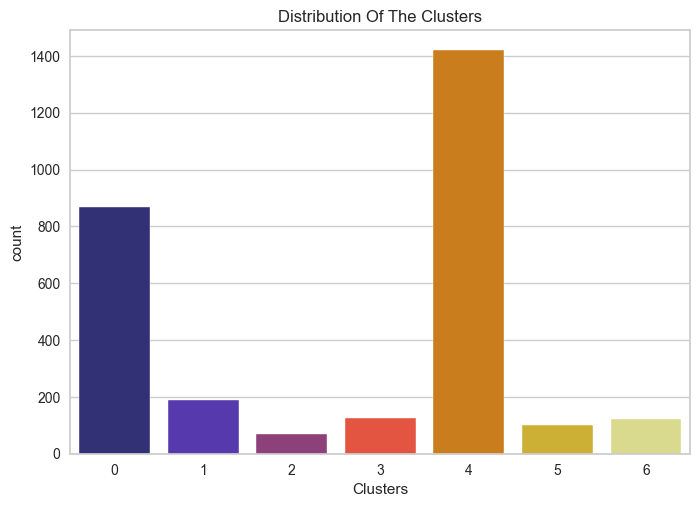

In [99]:
#Plotting countplot of clusters
pl = sns.countplot(x=df_positive["Clusters"], palette= "CMRmap")
pl.set_title("Distribution Of The Clusters")
plt.show()

We see here that the best clusters with maximum weightage are in **Cluster 0** and **Cluster 4**.

#### Understanding results of clustering:

For plotting and understanding the results we would need to map back to the original results so using the pre scaled datasets. And we are only looking into the **positive class** clustering as that is the segment of customers we are interested in.

In [100]:
X_not_scaled = X[['duration','campaign','month','day','balance','age','job','education','housing']]
X_not_scaled = pd.concat([X_not_scaled, df['y']], axis=1)
X_not_scaled = pd.concat([X_not_scaled, X_selected['Clusters']], axis=1)
X_not_scaled = X_not_scaled[X_not_scaled['y']=='yes']
X_not_scaled = X_not_scaled.drop(axis=1, columns='y')
X_not_scaled.shape

(2896, 10)

In [101]:
X_not_scaled.dtypes

duration     int64
campaign     int64
month        int32
day          int64
balance      int64
age          int64
job          int32
education    int32
housing      int64
Clusters     int64
dtype: object

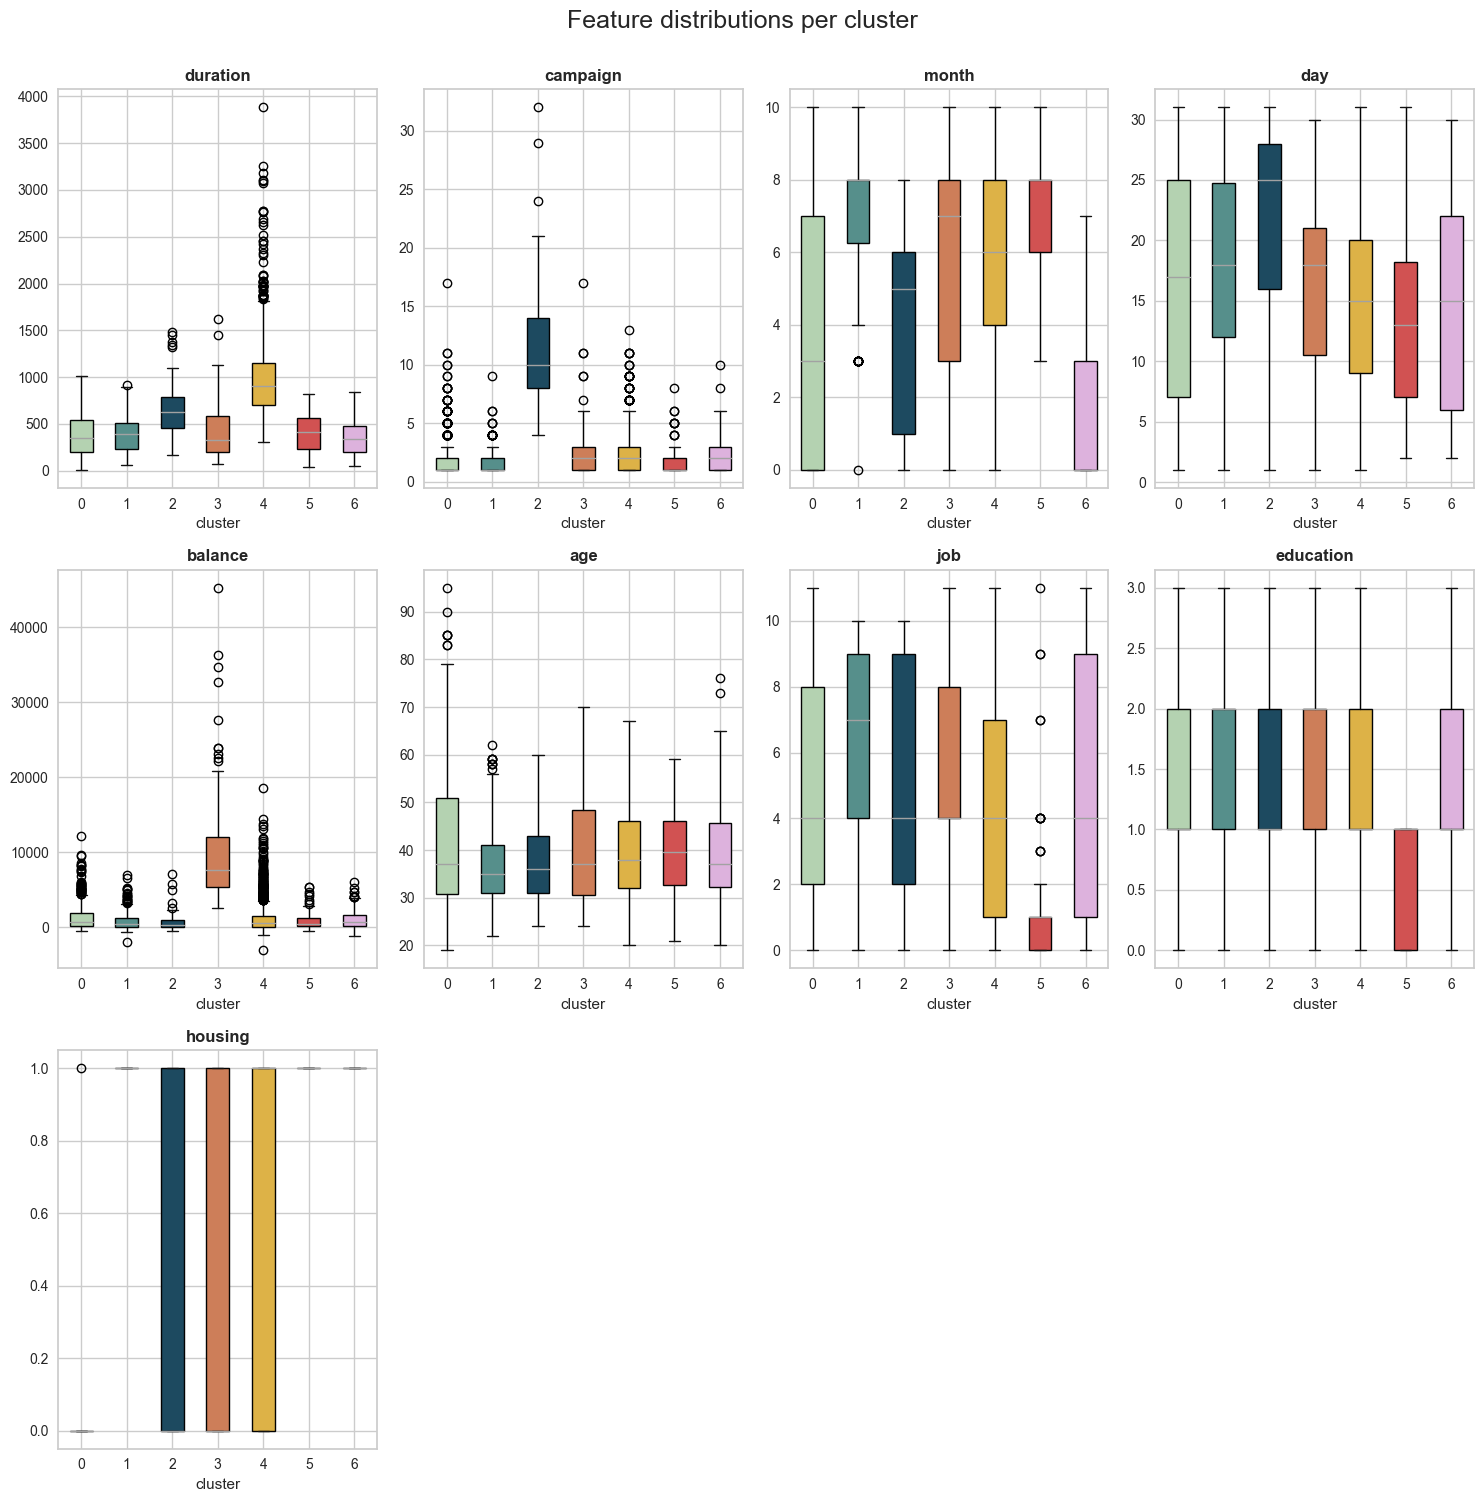

In [104]:
features = ['duration','campaign','month','day','balance','age','job','education','housing']
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252', '#ddb2dd']

ncols = 4
nrows = len(features) // ncols + (len(features) % ncols > 0)
fig = plt.figure(figsize=(15,15))

for n, feature in enumerate(features):
    ax = plt.subplot(nrows, ncols, n + 1)
    box = X_not_scaled[[feature, 'Clusters']].boxplot(by='Clusters',ax=ax,return_type='both',patch_artist = True)

    for row_key, (ax,row) in box.items():
        ax.set_xlabel('cluster')
        ax.set_title(feature,fontweight="bold")
        for i,box in enumerate(row['boxes']):
            box.set_facecolor(cluster_colors[i])

fig.suptitle('Feature distributions per cluster', fontsize=18, y=1)
plt.tight_layout()
plt.show()

### Summary for goal 2: 

b) The **Segments of Customers** we should prioritize are those who belong to the clusters **0** and **4** as that is the majority. And what are the traits or characteristics of the population in those clusters are as follows:

These are the customers who have
1) already have a **house loan**.
2) their last **call duration** which lasted **over 800 seconds** (between 800 to 1200 sec) 
3) have their age between **32 and 45**
4) And have **jobs** like blue-collar, entrepreneur, management , retired, services and self-employed.

Thus, these above segments can be prioritized for maximum successful sales of the investment product.